In [1]:
import tensorflow as tf
import pickle 
import util
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import os

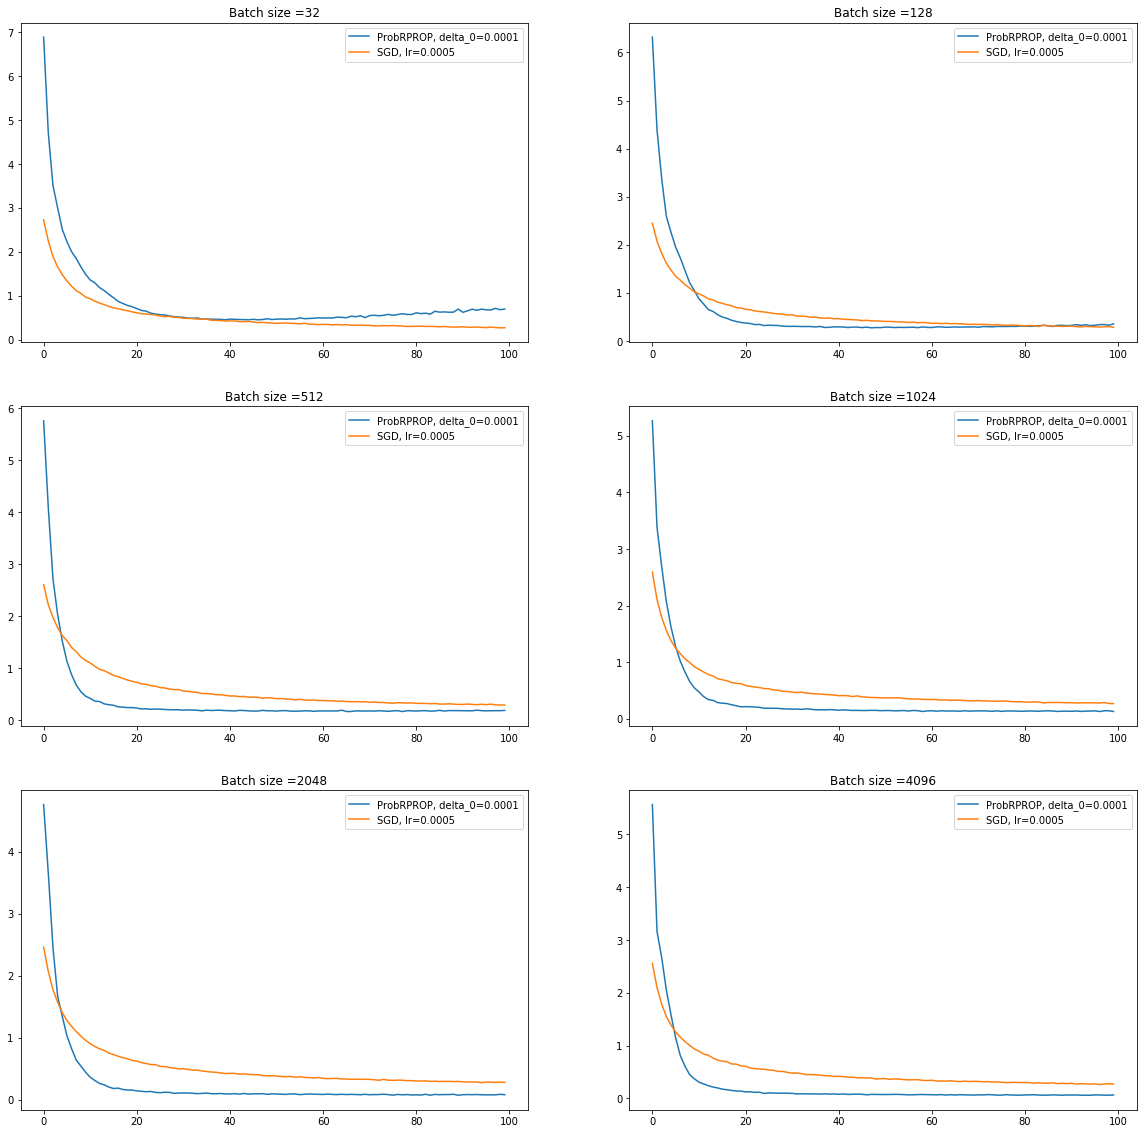

In [114]:
name ='CNN'
fig=plt.figure(figsize=(20,20))
for i,batch_size in enumerate([32, 128,512,1024,2048,4096]):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Batch size ="+str(batch_size))
    for delta_0 in [0.0001]:
        dir_load="../summary_for_delta2/"+name+"/"
        path = dir_load+"ProbRPROP"+", delta_0=" + str(delta_0) + ", batch_size=" + str(batch_size)
        for file in os.listdir(path):
            l=[]
            event_file_path=os.path.join(path, file)
            for e in tf.train.summary_iterator(event_file_path):
                for v in e.summary.value:
                    if v.tag == 'summaries/slow_train/mean_loss':
                        l.append(v.simple_value)
        line=ax.plot(l,  label="ProbRPROP, delta_0=" + str(delta_0))
    for lr in [0.0005]:
        path = dir_load+"SGD"+", lr=" + str(lr) + ", batch_size=" + str(batch_size)
        for file in os.listdir(path):
            l=[]
            event_file_path=os.path.join(path, file)
            for e in tf.train.summary_iterator(event_file_path):
                for v in e.summary.value:
                    if v.tag == 'summaries/slow_train/mean_loss':
                        l.append(v.simple_value)
        ax.plot(l, label="SGD"+", lr=" + str(lr))
    ax.legend()
plt.show()


In [15]:
name ='CNN'
batch_size = 16
delta_0 = 0.0001

dir_to_save="../summary_for_delta2/"+name+"/"
unique_str=dir_to_save+"ProbRPROP"+", delta_0=" + str(delta_0) + ", batch_size=" + str(batch_size)

with open('../summary_for_delta2/CNN/ProbRPROP, delta_0=0.0001, batch_size=16_delta_hists.pickle', 'rb') as f:
    delta_hists = pickle.load(f)

In [5]:
hists_var=[]
for v in range(len(delta_hists[0])):
    dicts={"counts":[],"nbins":[],"range":[]}
    hists_var.append(dicts)

for j,delta_hist_ittr in enumerate(delta_hists):
    
    for i,delta_hist_var in enumerate(delta_hist_ittr):
        hists_var[i]
        count=delta_hist_var["counts"]
        nbins=delta_hist_var["nbins"]
        ranges=delta_hist_var["range"]
        hists_var[i]["counts"].append(count)
        hists_var[i]["nbins"].append(nbins)
        hists_var[i]["range"].append(ranges)

In [6]:
hist_dict = hists_var[0]

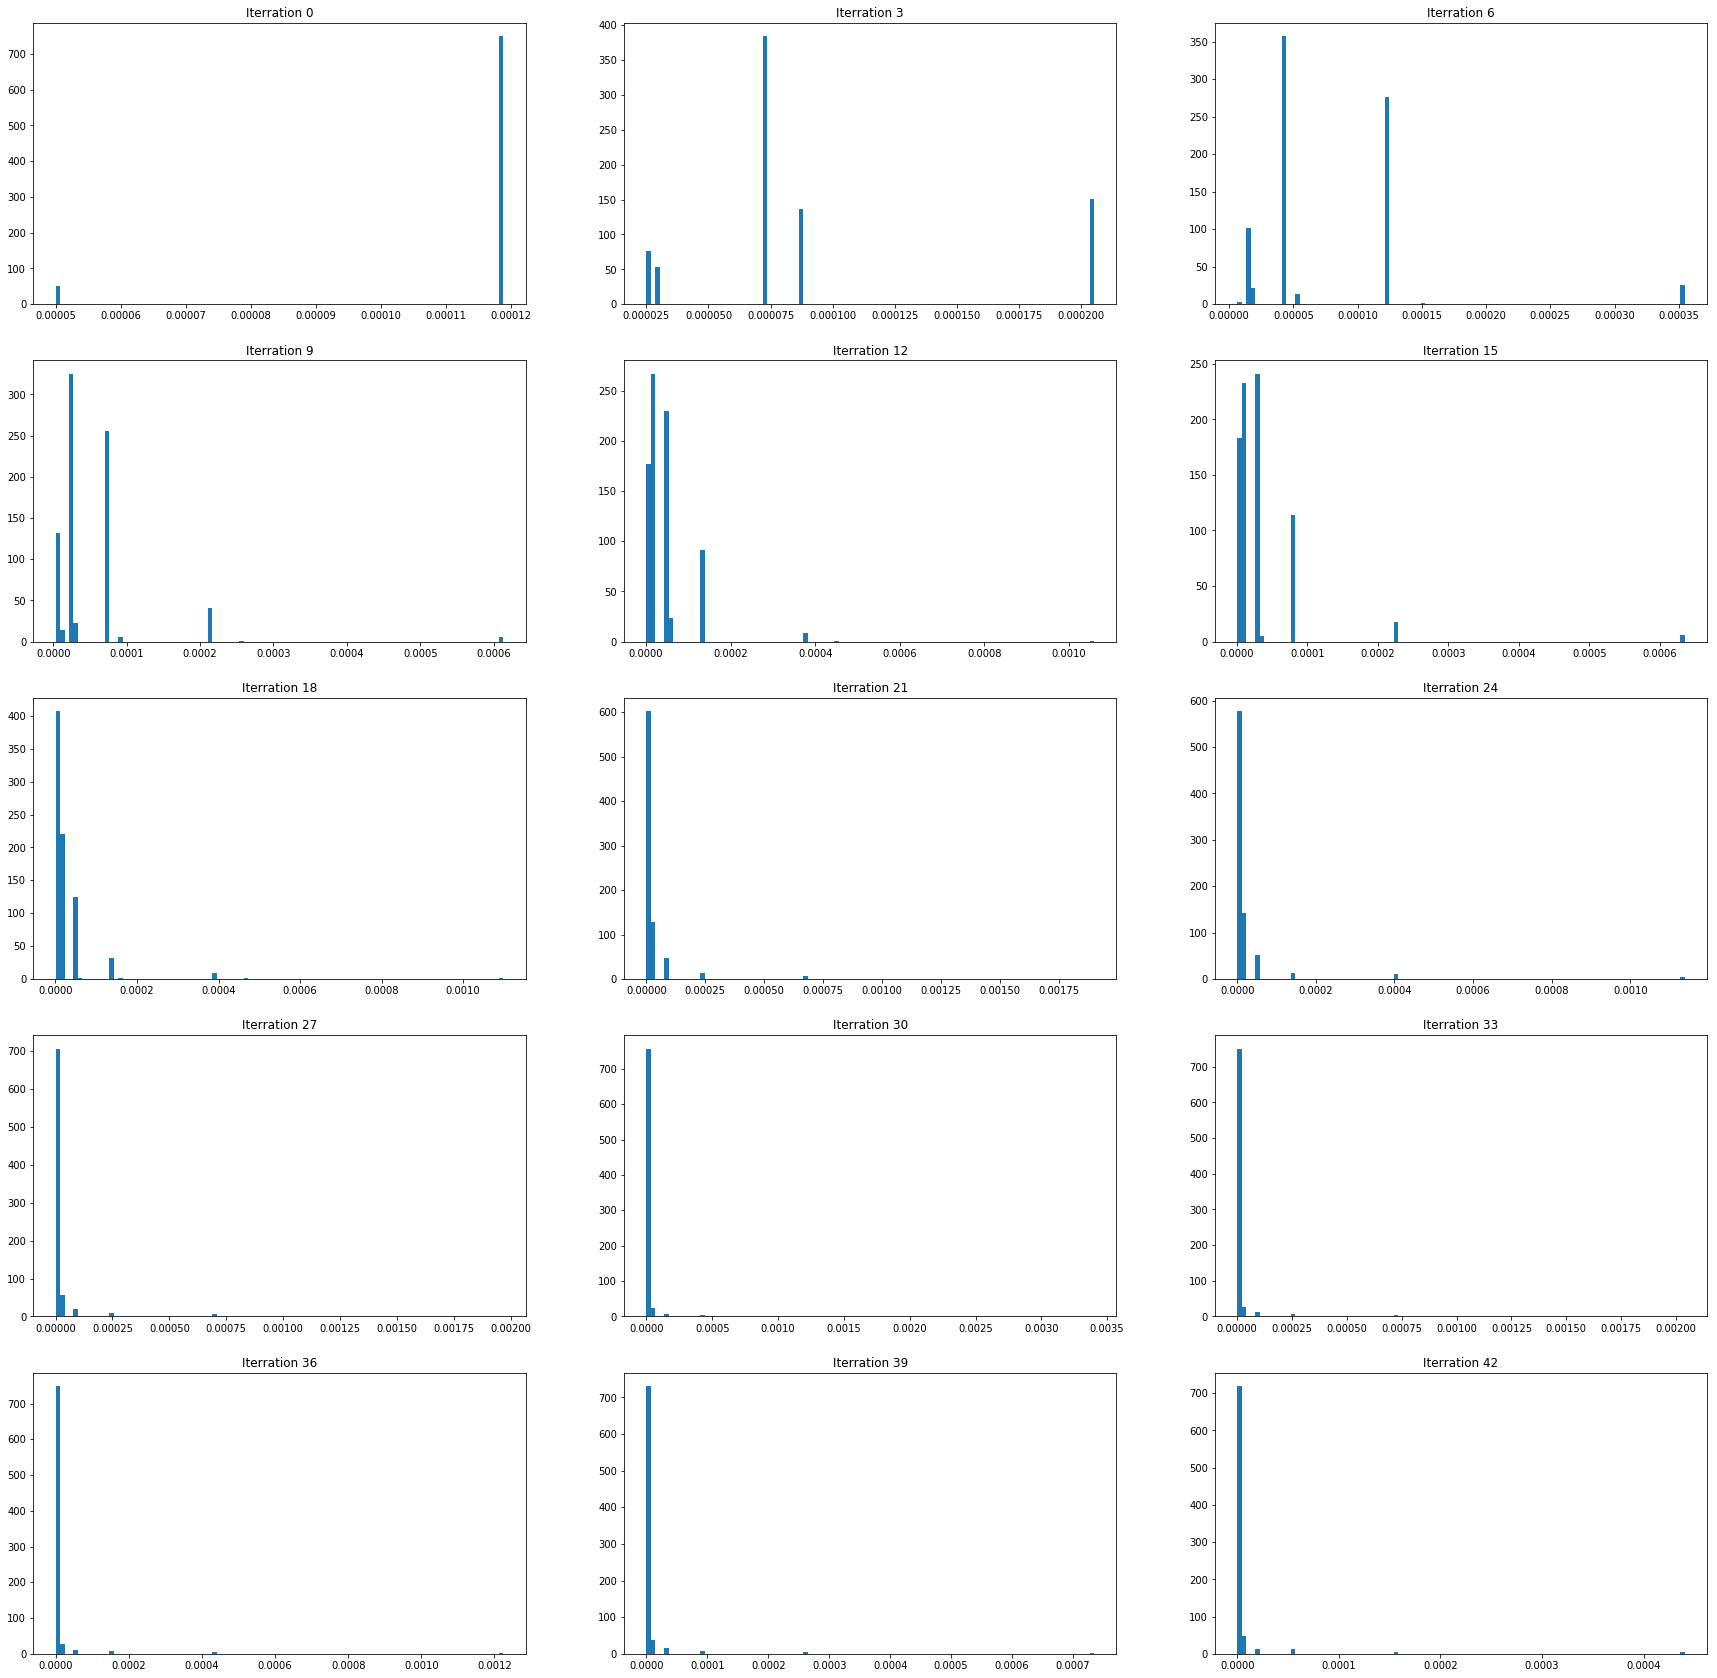

In [8]:
every = 3
fig = plt.figure(figsize=(30,30))
for i in range(15):
    ax=fig.add_subplot(5,3,i+1)
    itter =i*every
    counts=hist_dict["counts"][itter]
    nbins=hist_dict["nbins"][itter]
    min_x,max_x= hist_dict["range"][itter]
    bins = np.linspace(min_x,max_x,nbins+1)
    centroids = (bins[1:] + bins[:-1]) / 2
    counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                                 weights=counts, range=(min(bins), max(bins)))
    ax.set_title("Iterration "+str(itter))
plt.show()